/home/remko/.local/lib/python3.6/site-packages/matplotlib/axes/_base.py:3443: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0.0
  'bottom=%s, top=%s') % (bottom, top))


<Figure size 1280x1520 with 0 Axes>

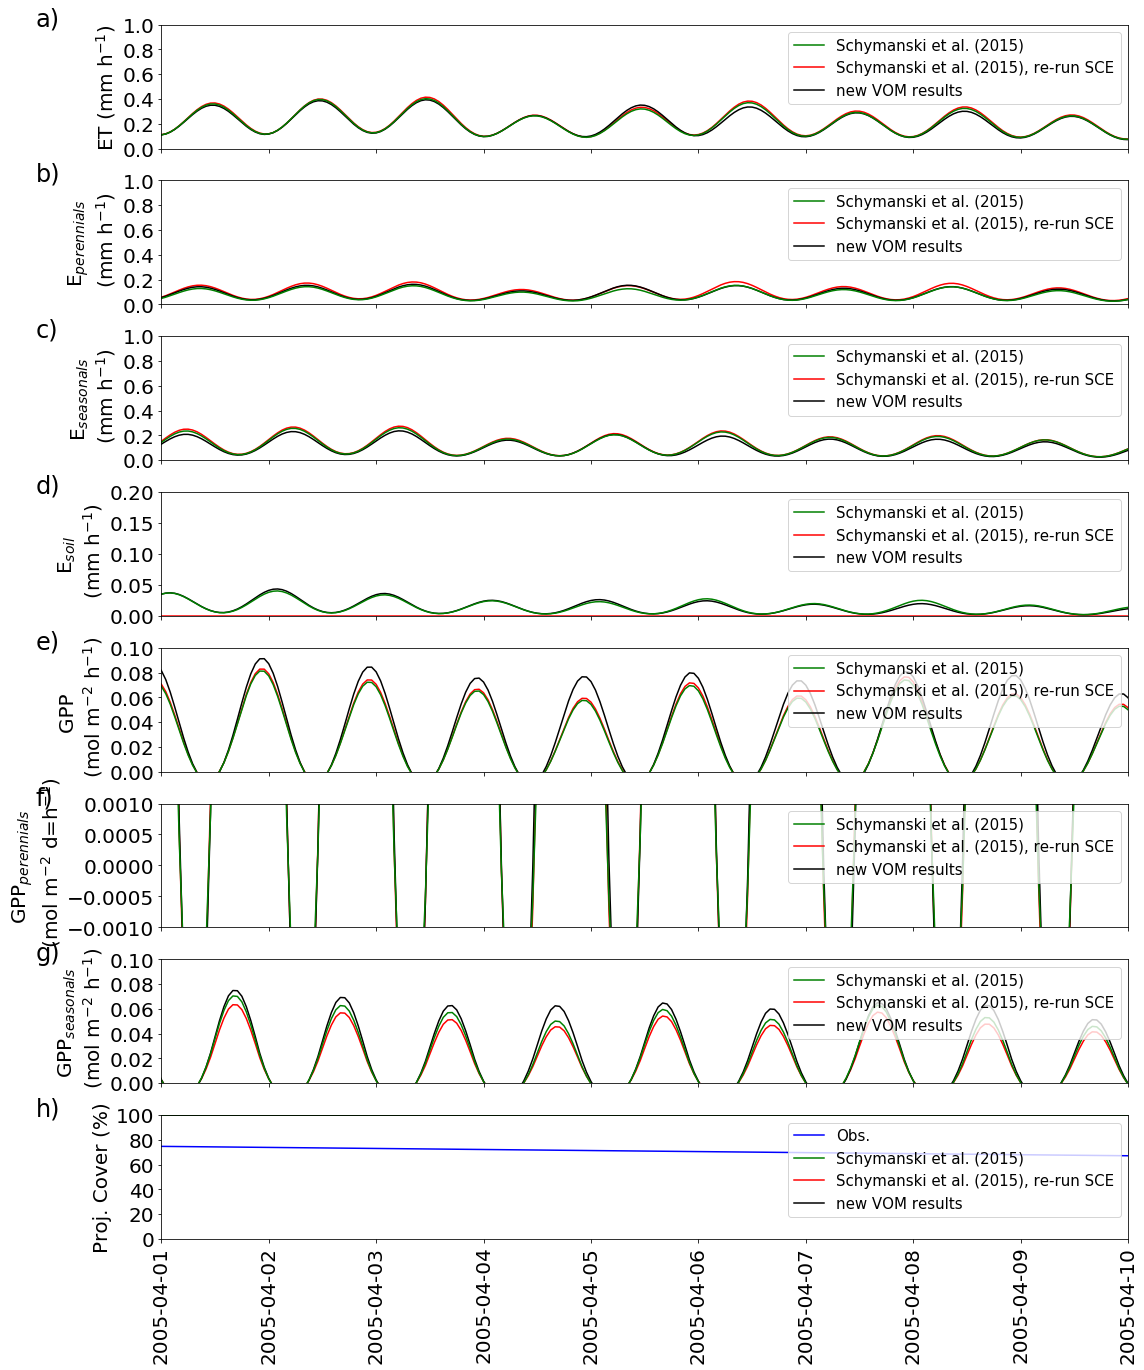

In [127]:
%run ../../src_py/plot_timeseries.py \
-i  ../../data/VOM_output/additional_analyses/comp2015/2_sce_check/sce_best/results_hourly.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_hourly.txt \
--var "evaptot" "etmt" "etmg" "esoil" "asstot" "asst" "assg" "pc" \
-ys 2005 -ye 2005 -ds 1 -de 10 -ms 4 -me 4 \
-w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultshourly.txt \
--pcobs ../../data/fPAR/fpar_howard_v5.txt \
--ymax 1 1 1 0.2 0.1  0.0 0.1 100 \
--ymin 0 0 0 0 0 0 0 0 \
--pcobsdates ../../data/fPAR/dates_v5 --labels VOM  --legend True \
--xloc_title -0.13 --yloc_title 1.05 --size_title 24 --moving_average 7  --colors red black gray \
--labels "Schymanski et al. (2015), re-run SCE" "new VOM results" "re-run SCE2" \
--figsize 16 19 --hpad -2 --sharex --labelsize 20 --hourly 


<Figure size 1280x960 with 0 Axes>

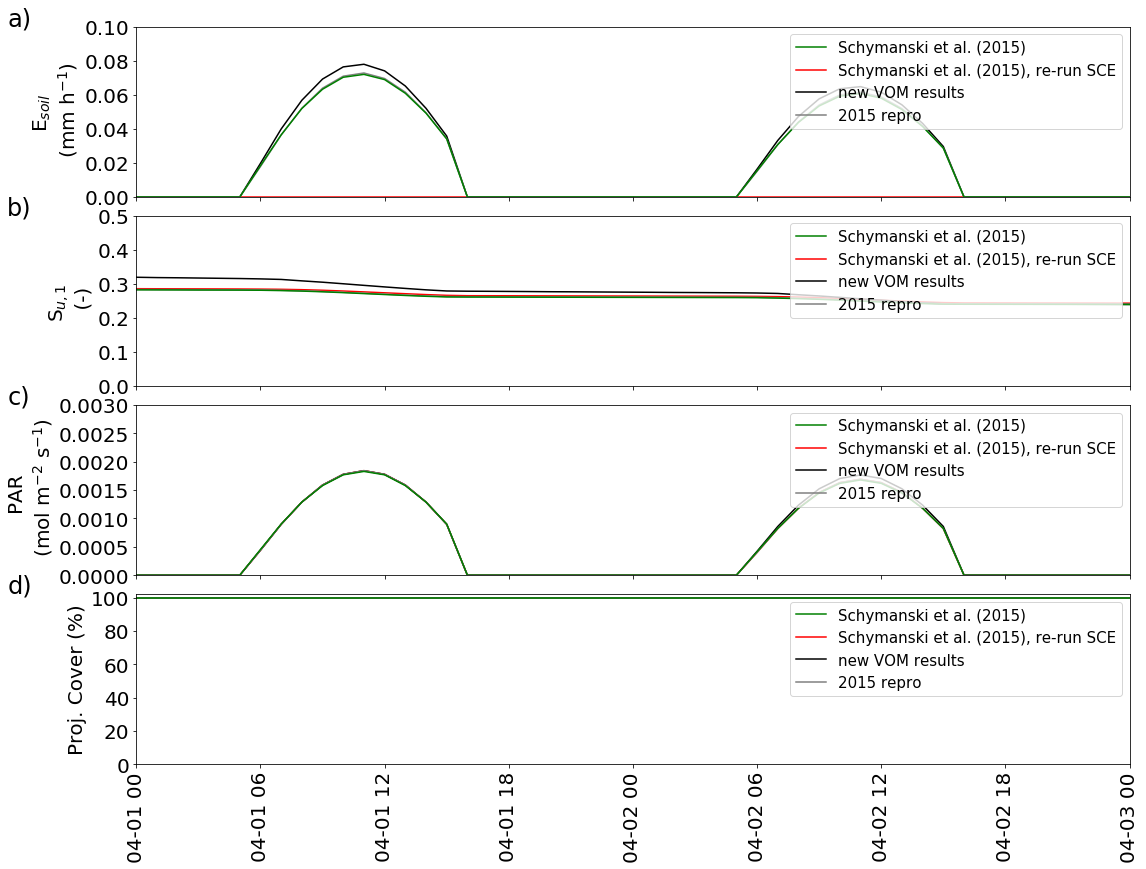

In [129]:
%run ../../src_py/plot_timeseries.py \
-i  ../../data/VOM_output/additional_analyses/comp2015/2_sce_check/sce_best/results_hourly.txt \
../../data/VOM_output/HowardSprings/freedrainage_cpcff1.0/sce_best/results_hourly.txt \
../../data/VOM_output/additional_analyses/comp2015/1_benchmark_repr/results_hourly.txt \
--var "esoil" "su_1" "par" "pc"\
-ys 2005 -ye 2005 -ds 1 -de 3 -ms 4 -me 4 \
-w ../../data/VOM_input/HowardSprings/dailyweather.prn \
--i2015 ../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultshourly.txt \
--ymax 0.1 0.5 0.003 102 0.2 0.1  0.0 0.1 100 \
--ymin 0 0 0 0 0 0 0 0 \
--pcobsdates ../../data/fPAR/dates_v5 --labels VOM  --legend True \
--xloc_title -0.13 --yloc_title 1.05 --size_title 24  --colors red black gray \
--labels "Schymanski et al. (2015), re-run SCE" "new VOM results" "2015 repro" \
--figsize 16 12 --hpad 0 --sharex --labelsize 20 --hourly 


In [35]:
par_h = 0.0015
srad2par_h = 2.0699
l_E_ = 2.45
rho_wat = 1000
i_trans_vegcov = 0.2
pc = 1
su__ = 0.3


esoil__  = (par_h /(srad2par_h * l_E_* rho_wat) ) * (1.0 - (1.0-i_trans_vegcov) * (pc)) * su__

print(esoil__)

esoil__  = 0.0002 * (1.0 - 0.8 * (pc )) * par_h * su__

print(esoil__)

1.7747086273516115e-08
1.7999999999999992e-08


In [104]:
data_tmp = np.genfromtxt("../../data/VOM_output/additional_analyses/comp2015/0_benchmark/resultshourly.txt", names=True)

date2015 = []
for iday in range(0,len(data_tmp["day"])):
    date_tmp = datetime(int(data_tmp["year"][iday]),int(data_tmp["month"][iday]),int(data_tmp["day"][iday]), int(data_tmp["hour"][iday]-1))
    date2015.append(date_tmp)
        
        
data2015 = pd.DataFrame(index=date2015, columns=["esoil", "par", "pc", "su_1", "esoil_calc"])

data2015["esoil"] = data_tmp["esoil"]*1000 #mm/hr
data2015["par"] = data_tmp["par"]
data2015["su_1"] = data_tmp["su_1"]
data2015["pc"] = data_tmp["pc"]




In [105]:
data_tmp = np.genfromtxt("../../data/VOM_output/additional_analyses/comp2015/2_sce_check/sce_best/results_hourly.txt", names=True)

tmod = np.arange(datetime(int(data_tmp["fyear"][0]),int(data_tmp["fmonth"][0]),int(data_tmp["fday"][0]),int(data_tmp["nhour"][0]-1)), 
                          datetime(int(data_tmp["fyear"][-1]),int(data_tmp["fmonth"][-1]),int(data_tmp["fday"][-1]), int(data_tmp["nhour"][-1]-1))+timedelta(hours=1), 
                          timedelta(hours=1)).astype(datetime)

data = pd.DataFrame(index=tmod, columns=["esoil", "par", "pc", "su_1", "esoil_calc"])
data["esoil"] = data_tmp["esoil"]*1000 #mm/hr
data["par"] = data_tmp["par"]
data["su_1"] = data_tmp["su_1"]
data["pc"] = data_tmp["pc"]



In [106]:
data_tmp = np.genfromtxt("../../data/VOM_output/additional_analyses/comp2015/1_benchmark_repr/results_hourly.txt", names=True)

tmod = np.arange(datetime(int(data_tmp["fyear"][0]),int(data_tmp["fmonth"][0]),int(data_tmp["fday"][0]),int(data_tmp["nhour"][0]-1)), 
                          datetime(int(data_tmp["fyear"][-1]),int(data_tmp["fmonth"][-1]),int(data_tmp["fday"][-1]), int(data_tmp["nhour"][-1]-1))+timedelta(hours=1), 
                          timedelta(hours=1)).astype(datetime)

data1 = pd.DataFrame(index=tmod, columns=["esoil", "par", "pc", "su_1", "esoil_calc"])
data1["esoil"] = data_tmp["esoil"]*1000 #mm/hr
data1["par"] = data_tmp["par"]
data1["su_1"] = data_tmp["su_1"]
data1["pc"] = data_tmp["pc"]



In [123]:


data2015["esoil_calc"]  = 1000*3600*(data2015["par"]/(srad2par_h * l_E_* rho_wat) ) * (1.0 - (1.0-i_trans_vegcov) * (data2015["pc"][:])) * data2015["su_1"][:]
data["esoil_calc"]  = 1000*3600*(data["par"] /(srad2par_h * l_E_* rho_wat) ) * (1.0 - (1.0-i_trans_vegcov) * (data["pc"][:])) * data["su_1"][:]
data1["esoil_calc"]  = 1000*3600*(data1["par"] /(srad2par_h * l_E_* rho_wat) ) * (1.0 - (1.0-i_trans_vegcov) * (data1["pc"][:])) * data1["su_1"][:]

data2015[["esoil","esoil_calc"]] 

,esoil,esoil_calc
2000-01-01 00:00:00,0.000000,0.000000
2000-01-01 01:00:00,0.000000,0.000000
2000-01-01 02:00:00,0.000000,0.000000
2000-01-01 03:00:00,0.000000,0.000000
2000-01-01 04:00:00,0.000000,0.000000
2000-01-01 05:00:00,0.008903,0.008798
2000-01-01 06:00:00,0.033937,0.033660
2000-01-01 07:00:00,0.057780,0.057271
2000-01-01 08:00:00,0.078515,0.077771
2000-01-01 09:00:00,0.094994,0.094036


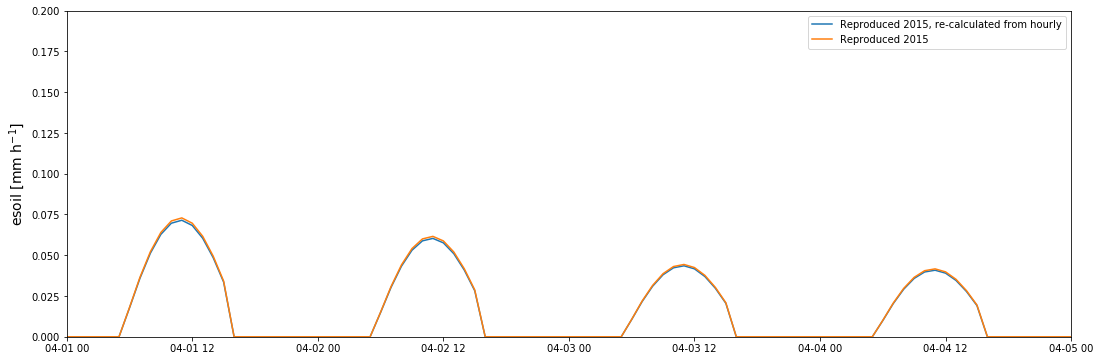

In [124]:
yearstart = 2005 
yearend = 2005 
daystart =  1 
dayend = 5 
monthstart = 4 
monthend = 4 


fig=plt.figure(figsize=(18, 6) )


#plt.plot(data2015.index, data2015["esoil_calc"], label = "2015, re-calculated from hourly" )
#plt.plot(data.index, data["esoil_calc"], label = "Re-run SCE, re-calculated from hourly" )
plt.plot(data.index, data1["esoil_calc"], label = "Reproduced 2015, re-calculated from hourly" )

#plt.plot(data2015.index, data2015["esoil"], label="2015")
#plt.plot(data.index, data["esoil"], label = "Re-run SCE")
plt.plot(data1.index, data1["esoil"], label = "Reproduced 2015")

plt.xlim([datetime(yearstart,monthstart, daystart), datetime( yearend, monthend, dayend)])
plt.ylim([0, 0.2])
plt.ylabel("esoil [mm h$^{-1}$]", size=14)

plt.legend()
plt.show()



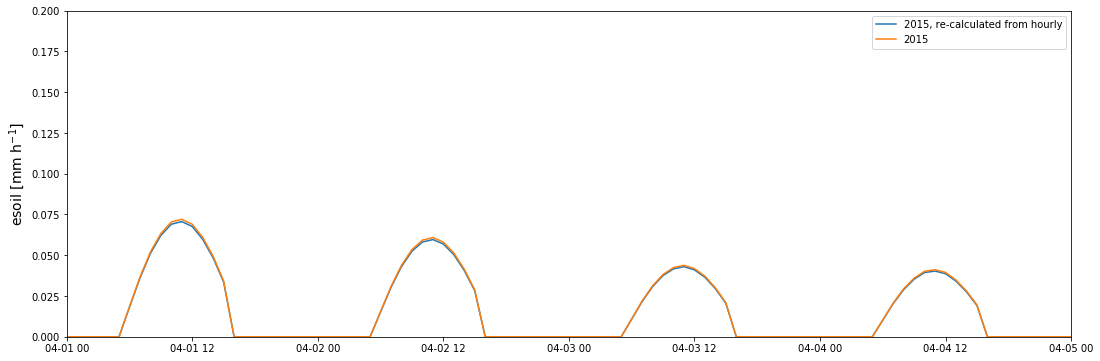

In [125]:
yearstart = 2005 
yearend = 2005 
daystart =  1 
dayend = 5 
monthstart = 4 
monthend = 4 


fig=plt.figure(figsize=(18, 6) )


plt.plot(data2015.index, data2015["esoil_calc"], label = "2015, re-calculated from hourly" )
#plt.plot(data.index, data["esoil_calc"], label = "Re-run SCE, re-calculated from hourly" )
#plt.plot(data.index, data1["esoil_calc"], label = "Reproduced 2015, re-calculated from hourly" )

plt.plot(data2015.index, data2015["esoil"], label="2015")
#plt.plot(data.index, data["esoil"], label = "Re-run SCE")
#plt.plot(data1.index, data1["esoil"], label = "Reproduced 2015")

plt.xlim([datetime(yearstart,monthstart, daystart), datetime( yearend, monthend, dayend)])
plt.ylim([0, 0.2])
plt.ylabel("esoil [mm h$^{-1}$]", size=14)

plt.legend()
plt.show()



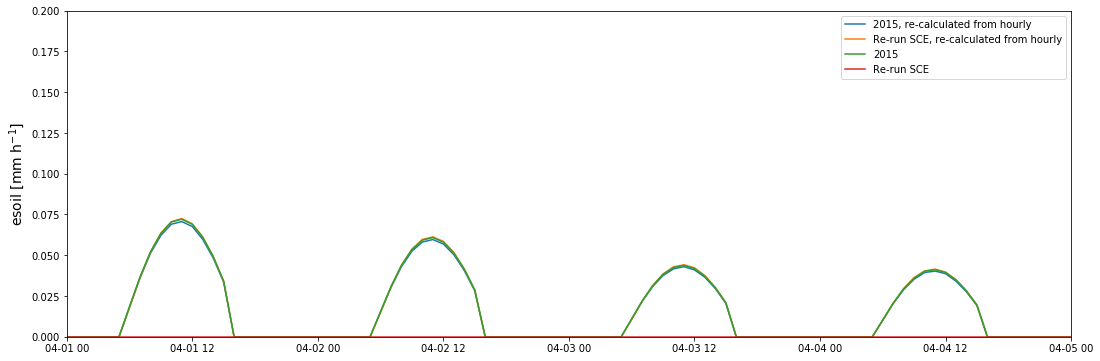

In [128]:
yearstart = 2005 
yearend = 2005 
daystart =  1 
dayend = 5 
monthstart = 4 
monthend = 4 


fig=plt.figure(figsize=(18, 6) )


plt.plot(data2015.index, data2015["esoil_calc"], label = "2015, re-calculated from hourly" )
plt.plot(data.index, data["esoil_calc"], label = "Re-run SCE, re-calculated from hourly" )
#plt.plot(data.index, data1["esoil_calc"], label = "Reproduced 2015, re-calculated from hourly" )

plt.plot(data2015.index, data2015["esoil"], label="2015")
plt.plot(data.index, data["esoil"], label = "Re-run SCE")
#plt.plot(data1.index, data1["esoil"], label = "Reproduced 2015")

plt.xlim([datetime(yearstart,monthstart, daystart), datetime( yearend, monthend, dayend)])
plt.ylim([0, 0.2])
plt.ylabel("esoil [mm h$^{-1}$]", size=14)

plt.legend()
plt.show()



2000-11-07 07:00:00    0.018219
2000-11-07 08:00:00    0.024655
Name: esoil, dtype: float64

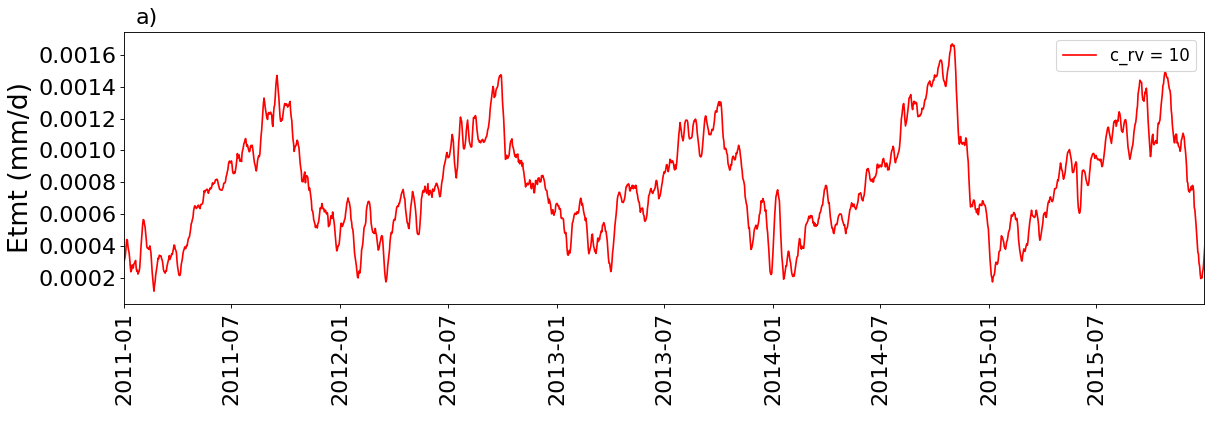

In [11]:
%run ../../src_py/plot_et_ass.py  \
-i ../../data/VOM_output/HowardSprings/freedrainage_cpcff10.0/sce_best/results_daily.txt \
-v etmt -ys 2011 -ye 2015 -w ../../data/VOM_input/HowardSprings/dailyweather.prn --moving_average 7 \
--ylabel "Etmt (mm/d)" \
--labels "c_rv = 10" "prescribed cover" "prescribed cover - mean monthly"  --title "a)" --legend True  \
--colors red black gray --moving_average 7 --mf 1000\
--figsize 18 4